# Methodology (Copied from Manuscript for Information)
Model Structure
The encounter rates of predator and prey species were examined using a modified version of PlanktonIndividuals.jl (Wu et al. 2022) that allowed for direct and active animal movement, and limitations to an animal’s perception of its environment (i.e., visual range, hereafter). The theoretical model domain was a 10 meters x 10 meters x 10 meters cube (1,000 cubic meters in volume) with no structural habitat, best simulating a pelagic environment. Only active movement (i.e., swimming) was considered when moving individuals and no spatial restrictions were placed on animal movement (i.e., the entire habitat was considered equally suitable). Both the predator and prey species were provided a scalar movement velocity vector (Table 1).

#
Table 1. The state variables used during the simulation and the calculation of consumption perceivable prey density 
Parameter	Value	Units
Simulation Parameters		
Predator Abundance	50	Individuals
Prey Abundance	25–900	Individuals
Predator Swim Speed	0.01	m s-1
Prey Swim Speed	0.0001–1	m s-1
Predator Visual Range	4.92	m
Prey Visual Range	0–62.04	m
Simulation Length	300	minutes
Handling Time	8	minutes
Consumption Parameters		
Clearance Rate	0.01	m3 ind-1 s-1
Prey Weight	5	g
Prey Energy Density	5,000	Joules
Predator Capture Success	0.7	Dimensionless
#

Simulations
The predator-prey encounter rates were examined as a function of prey abundance (25–900 individuals at varying intervals), prey velocity (0.0001–1 m s-1), and prey visual field (0–62.04 m radius; Table 1). Predator velocity (0.01 m s-1), predator visual field (4.92 m radius; i.e., half of the model domain), predator abundance (n = 50 individuals), and predator handling time (8 minutes) were the same in each simulation. Boundary effects (i.e., preys trapped in model domain corners by predators) were removed by allowing both predators and preys to “jump” from one end of the grid to another, creating an endless domain. The domain size, movement velocities, and visual fields were chosen to provide a relative representation of two hypothetical species. Since these parameters will vary with species’ morphology and visual capabilities, these parameters do not necessary represent one particular predator-prey interaction, but instead are designed to explore how encounter rates vary in relative relation to each other. Prey abundances remained constant throughout each simulation (i.e., no fluctuation prey abundance) and consumed preys were respawned at random coordinates. Random spawning potentially created encounters if a prey was spawned in a suboptimal location near a predator, so ten iterations were conducted for each scenario. All predators and preys moved at each time step. The predators attempted to move towards the closest prey and the prey attempted to move towards the optimal location to avoid all predators within their visual range (i.e., furthest location from all predators). If there were no preys within the predator’s visual range or no predators within the prey’s visual range, the individual moved at a random vector at a distance consistent with their swimming velocity. When predators reached preys, consumption occurred and an eight-minute handling time period was applied to that predator. The simulation operated at a one-minute scale and continued for 300 minutes. The encounter rate (N encounters timestep-1) was calculated for each simulation and comparisons were made among prey velocities, visual fields, and abundances.
Two prey densities (n) were calculated during each simulation, a global prey density (prey abundance / volume of model domain) and local prey density (n perceivable preys / volume of perceivable area). Within simulations, the global prey density was the same for each predator because prey abundance and the size of the model domain were constant throughout the simulation. However, each predator could experience a different local prey density and this value could vary throughout the simulation for each individual. During the last time step of each simulation, the number of preys within each predator's perceivable area was recorded. The last timestep reflected the combined effects of each preceding timestep's animal movements and had the most refined estimate of the preys surrounding each predator. Global and local prey densities were converted to consumption (C; Joules) according to an assumed Type II ecological functional response curve (Equation 1; (Langbehn et al. 2019)).
C= p_c*w*d*  (c*n)/(1+h*c*n)									(1)
where clearance rate (c; 0.01 m3 min-1 ind-1) and handing time (h; 8 minutes) parameters estimate the encounter rate used in the equation. A predator success coefficient (pc; 0.7), prey weight (w; 5g), and prey energy density (d; 5,000J) convert the estimated encounter rate to the possible biomass consumed during that time step. Although the initial model assumed predator’s were always successful, a value of 0.7 was considered more realistic and was applied to both grid-based and individual-based densities. The chosen values represent those that may be realistic for this model domain, but could be any, as they would scale equally for both global and local prey density-consumption calculations. 


# Results
Results for the manuscript that explores the modulation of predator behavior on functional response curves

## Figure 1: The theory behind prey density. Figure will go in the introduction 

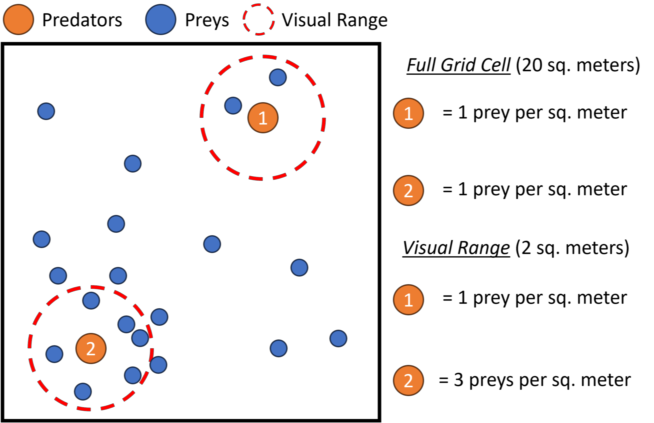

In [23]:
using Images, FileIO

cd("D:/pz_encounter/outputs")
image_path = "Schematic.png"
img = Images.load(image_path)
display(img)

## Figure 2: Encounter rates as a function of prey density
Functional response curves follow a Type II functional response curve, but there is a heavy influence by prey swimming velocity and vision.

- Colors are relative swimming velocities (Predator/Prey)
- Facets are prey visual distance in meters (radius of circumference)

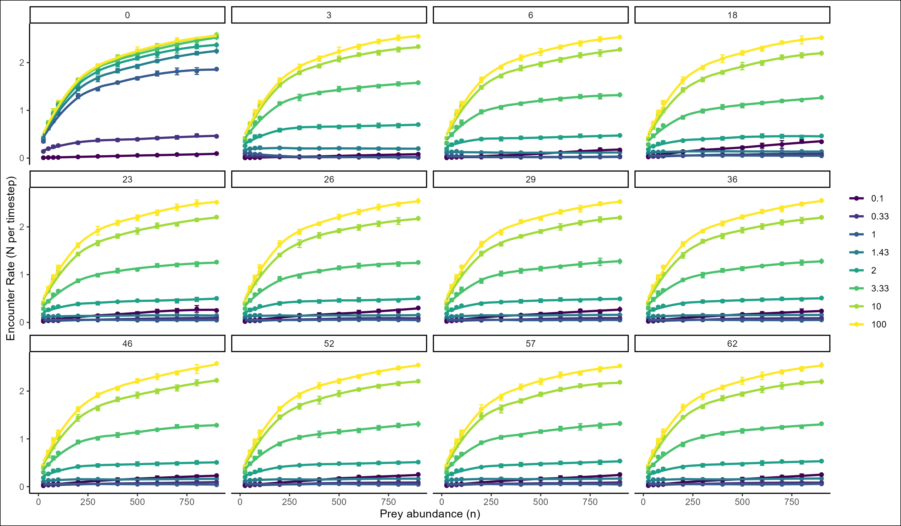

In [24]:
image_path = "Encounter_rate_prey_abundance.png"
img = Images.load(image_path)
display(img)

## Figure 3: Encounter rates as a function of relative swimming velocity.


- The x-axis is log-transformed to show low values
- There is a logarithmic relationship (sigmoidal looking because of the x-axis transformation)
- Prey density has an effect here
- Prey visual acuity has an effect in the context of blind vs. not blind, but not more than that.


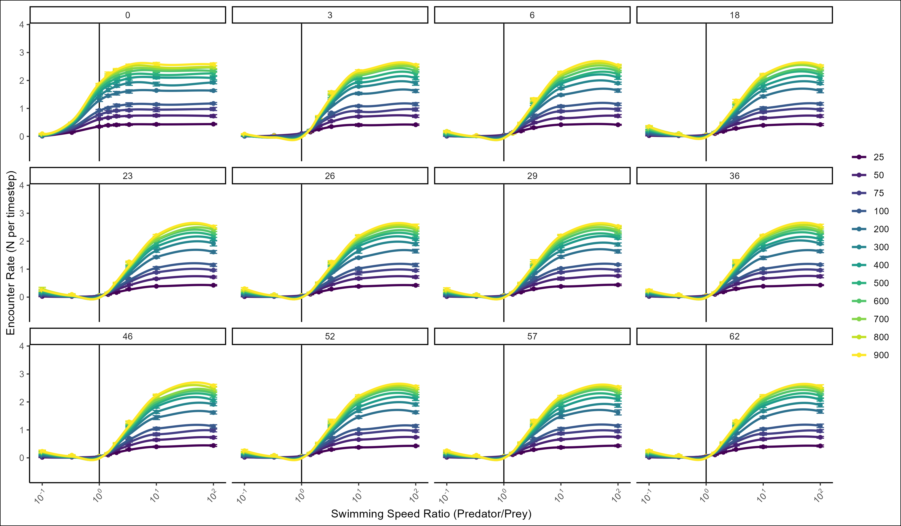

In [25]:
image_path = "Encounter_rate_prey_velo.png"
img = Images.load(image_path)
display(img)

## Figure 4. The number of preys in the predator's perceivable area increases with prey size, but the proportion of preys does not.

A & B only shows a prey vision of 0.4 (proportion of model domain) & prey velocity of 1e-4 (same as predator). The other relationships are in the Appendix (below)


A) The number of preys in each predator's perceivable area increases with increased prey abundance 
B) The proportion of available preys within the perceivable area does not increase, and the modal proportion sligthly decreases with incresaed prey abundance
C) The variation in local prey density among all predators increases with increased prey abundance. Only showing 4 visual ranges here since there is not really a difference

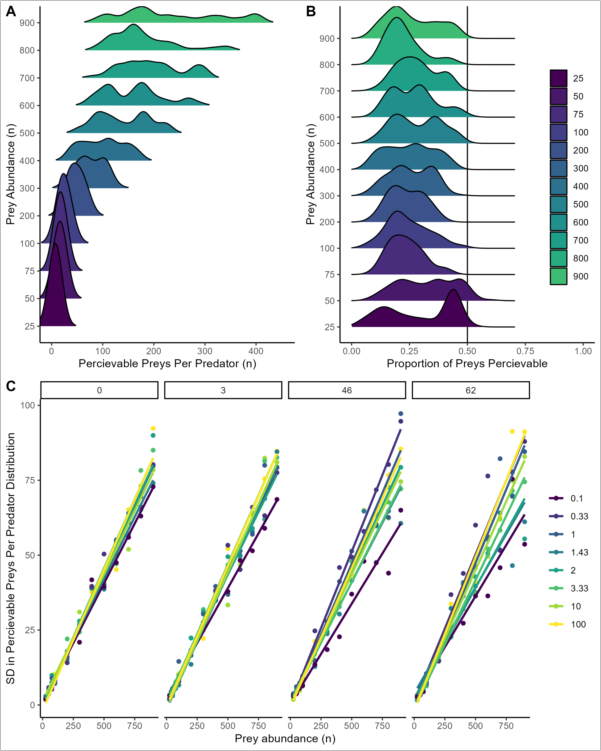

In [26]:
image_path = "Full_Prey_Density_Variance.png"
img = Images.load(image_path)
display(img)

# Consumption rates as a function of prey abundance

- Converted prey densities to estimated encounter rates using a Type II Functional response equation (aP/1+ahP) with assumed clearance rate (a; 0.01 m3/pred ind/s) and handling times (h; 8 min)
- Converted estimated encounter rates to estimated consumption rate using assumed prey weight (5g), prey energy density (5,000 J/g), and predation success (70%; from Langbehn et al. 2021)
- Red: Global prey density
- Grey: Local prey density

The estimated consumption rate is almost always less with the local prey density than global prey density, regardless of prey visual range and swimming velocity. Local prey densities create greater uncertainty in this estimation and this is caused by the patchy nature of preys (see Fig. 4)

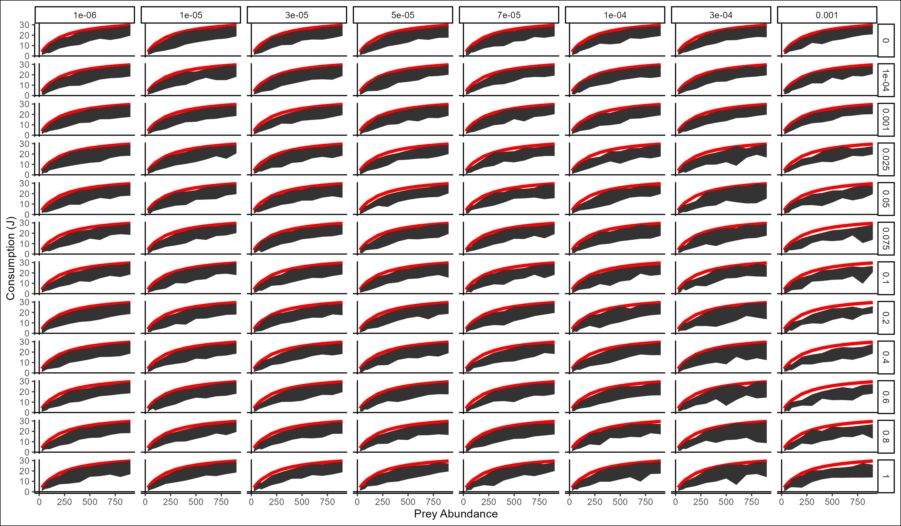

In [27]:
image_path = "Consumption_Rates.png"
img = Images.load(image_path)
display(img)

# Appendix Figures / Extra

## Individual prey densities are not a function of prey velocity or prey vision

- Successive plots show there is no effect

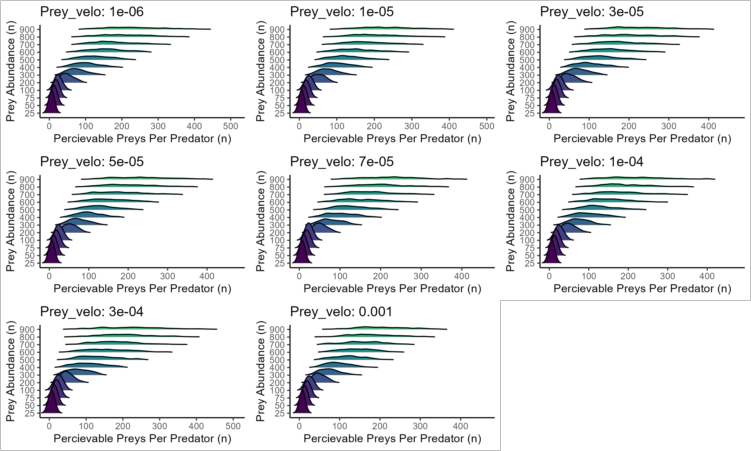

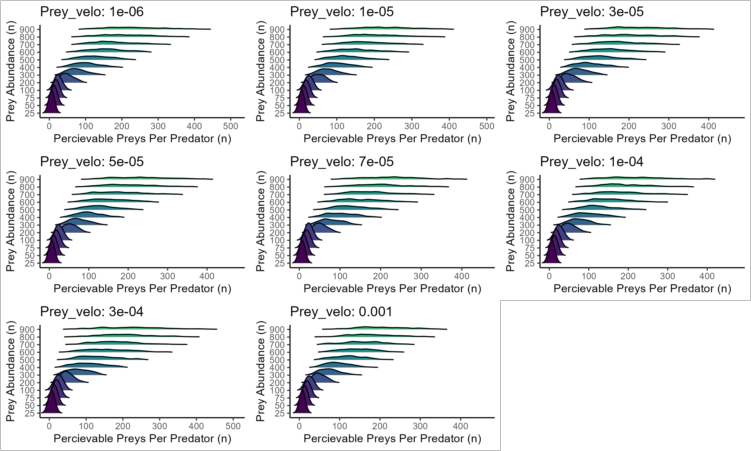

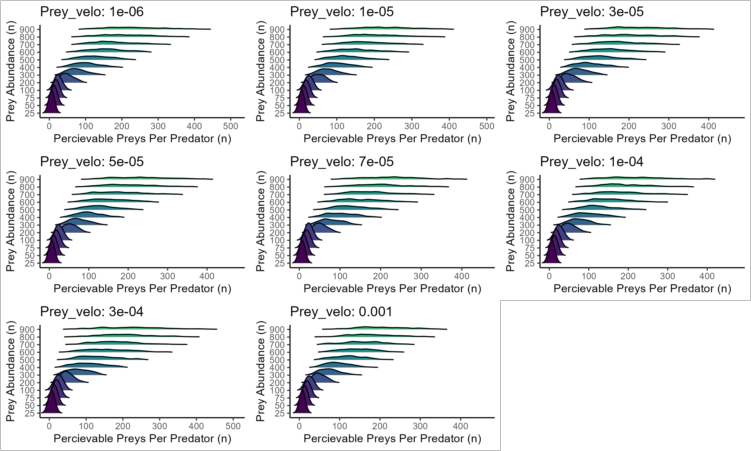

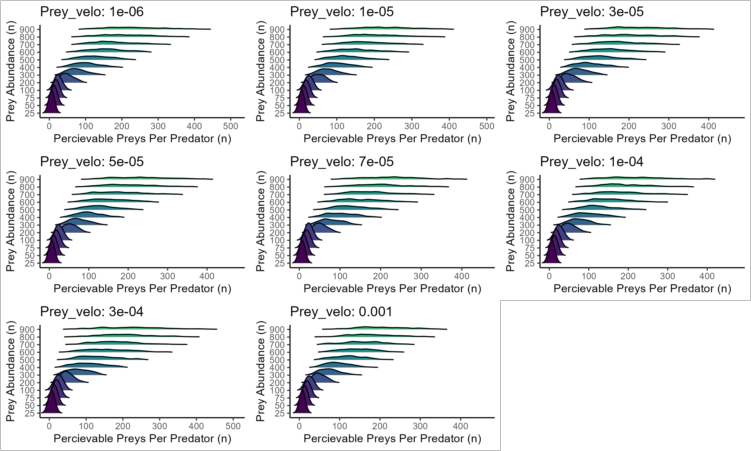

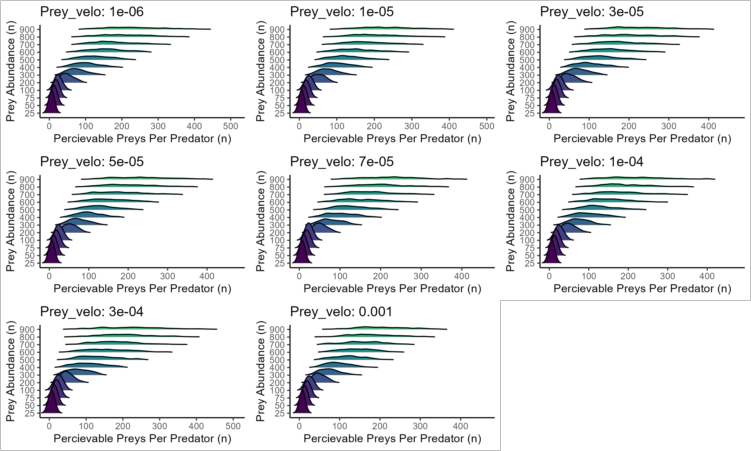

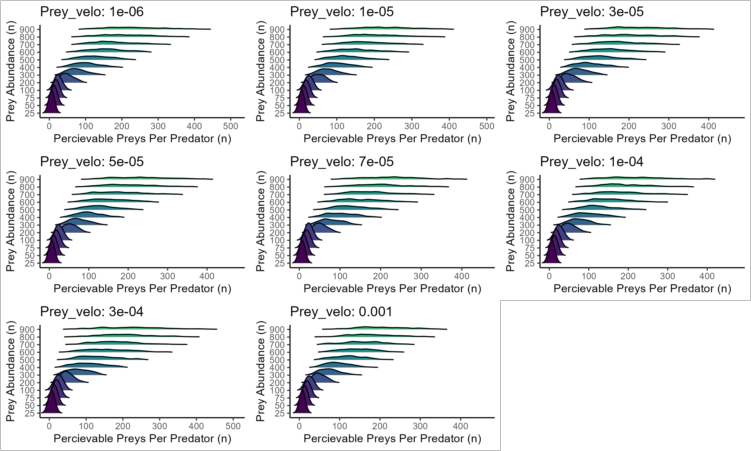

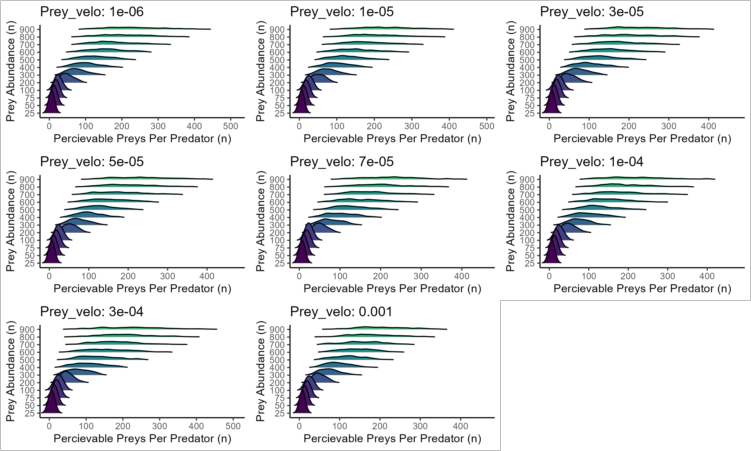

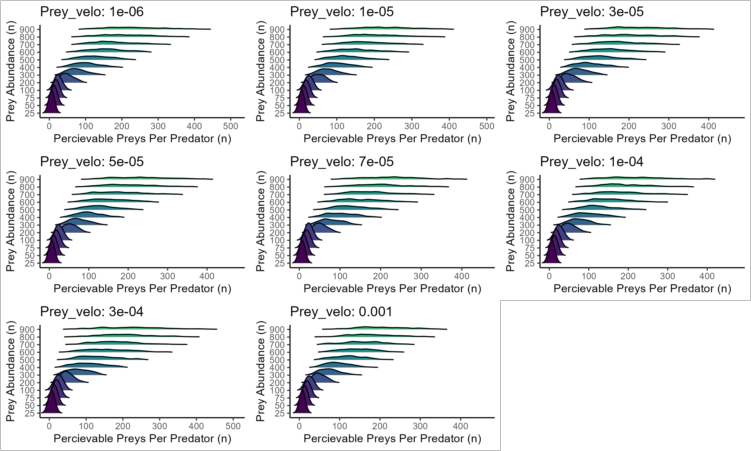

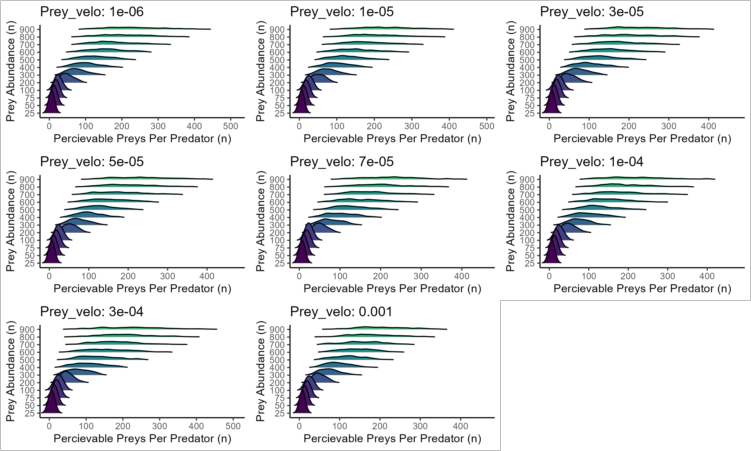

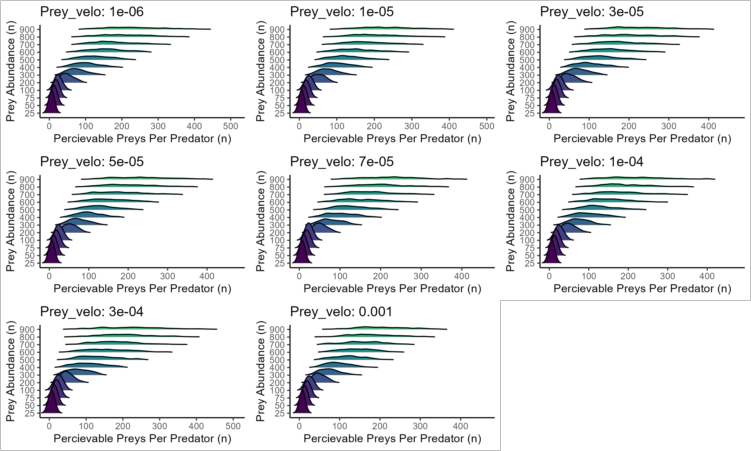

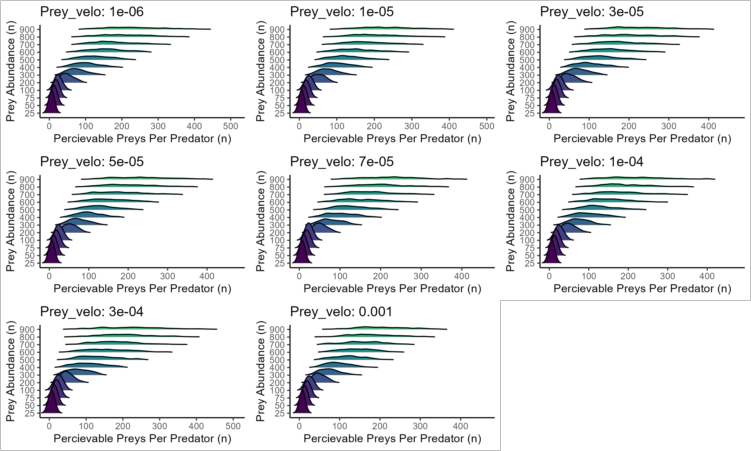

In [28]:
image_path = "Densities/Prey Vis_0.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_1e-04.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_0.001.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_0.025.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_0.05.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_0.1.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_0.2.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_0.4.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_0.6.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_0.8.png"
img = Images.load(image_path)
display(img)

image_path = "Densities/Prey Vis_1.png"
img = Images.load(image_path)
display(img)